In [1]:
import numpy as np
from matplotlib import pyplot as plt

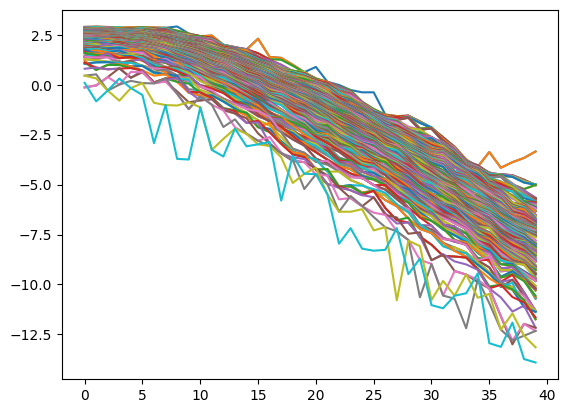

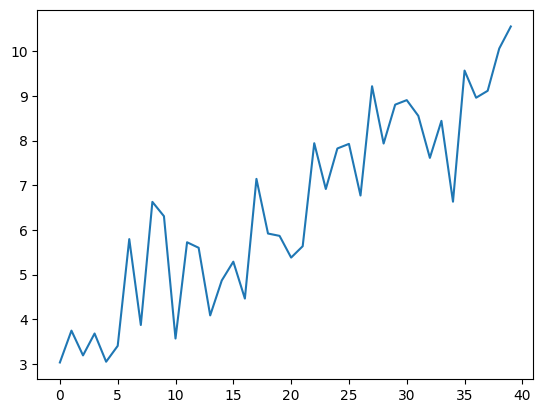

In [17]:
size = 300
a = np.random.randn(size,size)
eigs = np.abs(np.linalg.eigvals(a))
eigslist = [eigs]
eigratios = [np.max(eigs)/np.min(eigs)]
repeats = np.arange(40)
for i in repeats[1:]:
    a = a * np.random.randn(size,size)
    eigs = np.abs(np.linalg.eigvals(a))
    eigslist += [eigs]
    eigratios.append(np.max(eigs)/np.min(eigs))
eigs = np.array(eigs)
eigratios = np.array(eigratios)
plt.plot(repeats, np.log(eigslist))
plt.show()
plt.plot(repeats, np.log(eigratios))


In [18]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming 'eigslist' is already populated as per your script

# Create a figure with a slider
fig = make_subplots()
sliders = [{
    'active': 0,
    'pad': {"t": 50},
    'steps': []
}]

# Add a histogram to the figure for each set of eigenvalues
for i, eigs in enumerate(eigslist):
    fig.add_trace(
        go.Histogram(
            x=eigs,
            name=f'Repeat {i}',
            visible= (i == 0),  # Only the first histogram is visible initially
            nbinsx=50
        )
    )
    # Add a step to the slider
    sliders[0]['steps'].append({
        'method': 'update',
        'args': [{'visible': [j == i for j in range(len(eigslist))]},
                 {'title': f'Repeat: {i}'}]
    })

# Update layout with slider
fig.update_layout(
    sliders=sliders,
    title="Distribution of Eigenvalues Over Repeats",
    height=600,
    width=800,
)


# Show the figure
fig.show()
 